4422102/4422102 [==============================] - 1s 0us/step
[9 0 0 ... 3 0 5]
(60000, 28, 28)
(10000, 28, 28)


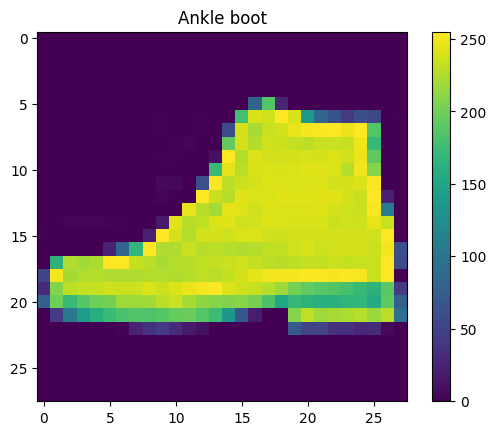

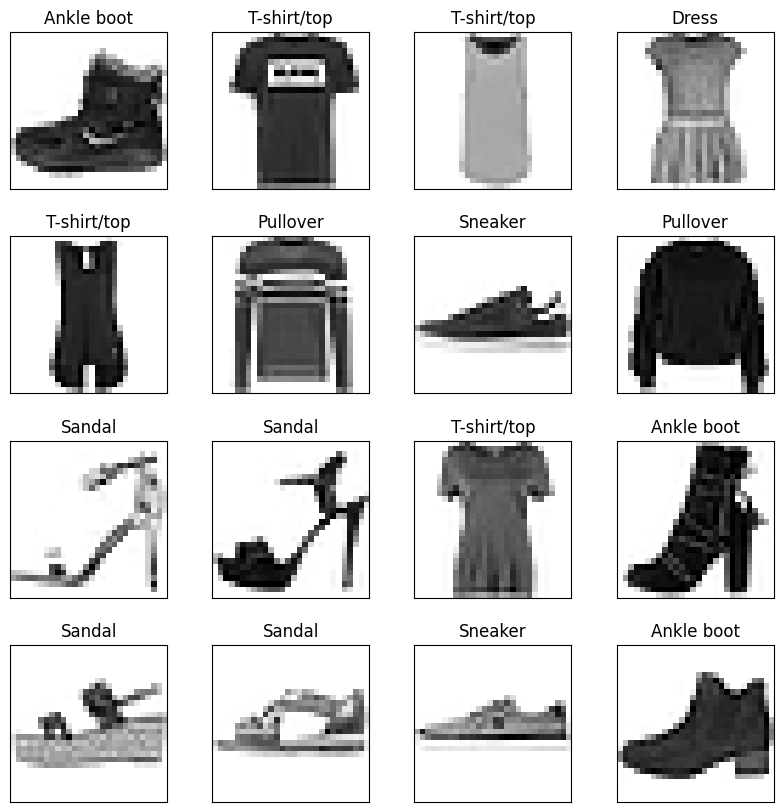

(60000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1

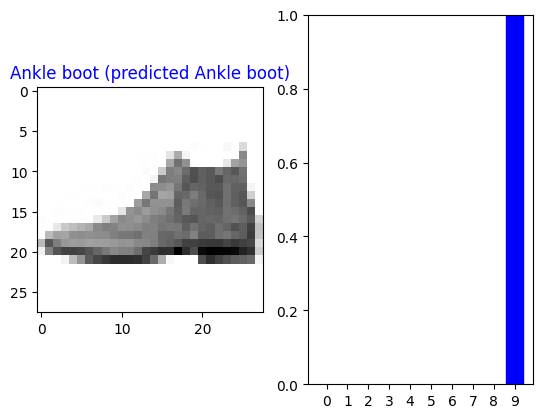

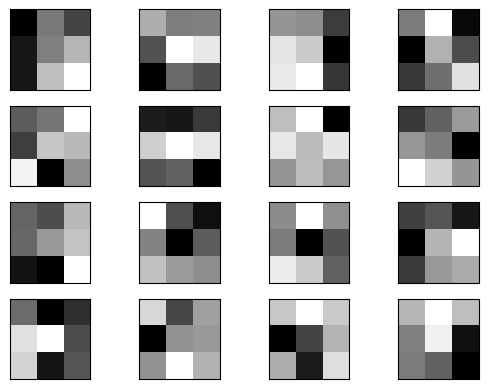

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_labels)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)

print(test_images.shape)

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[42]])
plt.show()


import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()




X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(X_train.shape)

tf.random.set_seed(42)


from tensorflow.keras import datasets, layers, models, losses
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=10)

test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)

print('Accuracy on test set:', test_acc)


predictions = model.predict(X_test)
print(predictions[0])

import numpy as np
print('Predicted label for the first test sample: ', np.argmax(predictions[0]))
print('True label for the first test sample: ',test_labels[0])


def plot_image_prediction(i, images, predictions, labels, class_names):
    plt.subplot(1,2,1)
    plt.imshow(images[i], cmap=plt.cm.binary)
    prediction = np.argmax(predictions[i])
    color = 'blue' if prediction == labels[i] else 'red'
    plt.title(f"{class_names[labels[i]]} (predicted {class_names[prediction]})", color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plot = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    plot[prediction].set_color('red')
    plot[labels[i]].set_color('blue')
    plt.show()

plot_image_prediction(0, test_images, predictions, test_labels, class_names)




filters, _ = model.layers[2].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 16
for i in range(n_filters):
    filter = filters[:, :, :, i]
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(filter[:, :, 0], cmap='gray')
plt.show()